In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# to show current working directory
!pwd 
!ls
%cd /content/drive/MyDrive/Colab Notebooks/
!ls

/content
drive  sample_data
/content/drive/MyDrive/Colab Notebooks
spectrograms  UrbanSoundsClassification.ipynb


In [4]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [9]:
# to set path containing pics
path = '/content/drive/MyDrive/Colab Notebooks/spectrograms'

# GrayScale - Resize - Normalization

In [10]:
%%time

X_data = []
y_data = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = cv2.resize(pic, (32, 32))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))
        # print(os.path.join(subdir, file))
        # print(int(subdir[-1]))

X = np.array(X_data) / 255
y = np.array(y_data).reshape(-1, 1)

#converting the list to numpy array and saving it to a file using #numpy.save
np.save(os.path.join(path,'X_array'), X)
np.save(os.path.join(path,'y_array'), y)

print(X.shape)
print(y.shape)

(7732, 32, 32)
(7732, 1)
CPU times: user 34.5 s, sys: 4.81 s, total: 39.3 s
Wall time: 2min 3s


In [11]:
print(X[0:2])
print(y[0:2])

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.02745098 0.00784314 ... 0.07058824 0.06666667 0.07058824]
  [0.         0.09803922 0.11764706 ... 0.13333333 0.0627451  0.14901961]
  ...
  [0.04705882 0.51764706 0.59215686 ... 0.62745098 0.5372549  0.5372549 ]
  [0.09803922 0.74509804 0.6745098  ... 0.77647059 0.75686275 0.61176471]
  [0.05098039 0.43137255 0.57647059 ... 0.74901961 0.66666667 0.65098039]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.02745098 0.01176471 0.02745098 ... 0.03137255 0.14901961 0.08627451]
  [0.00392157 0.02352941 0.03529412 ... 0.09019608 0.15686275 0.1372549 ]
  ...
  [0.41176471 0.46666667 0.38823529 ... 0.43921569 0.52941176 0.34117647]
  [0.60784314 0.74117647 0.68235294 ... 0.67058824 0.75686275 0.61568627]
  [0.43921569 0.57647059 0.4627451  ... 0.72941176 0.47058824 0.56470588]]]
[[0]
 [0]]


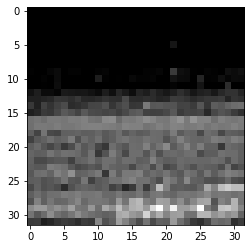

(32, 32)


In [24]:
plt.imshow(X[100],cmap="gray")
plt.show()

print(X[100].shape)

# Train - Test and Validation Datasets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 5412
y_train: 5412
X_val: 1160
y_val: 1160
X_test: 1160
y_test: 1160


# Saving Train - Test and Validation Datasets

In [26]:
pathnew= '/content/drive/MyDrive/Colab Notebooks'

np.save(os.path.join(pathnew,'X_train'), X_train)
np.save(os.path.join(pathnew,'y_train'), y_train)

np.save(os.path.join(pathnew,'X_val'), X_val)
np.save(os.path.join(pathnew,'y_val'), y_val)

np.save(os.path.join(pathnew,'X_test'), X_test)
np.save(os.path.join(pathnew,'y_test'), y_test)

In [14]:
# Create a model object
model = tf.keras.Sequential()

In [15]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32, 32, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [16]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
43/43 [==============================] - 12s 15ms/step - loss: 2.1186 - accuracy: 0.2055 - val_loss: 1.7008 - val_accuracy: 0.4319
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 1.7323 - accuracy: 0.3607 - val_loss: 1.4327 - val_accuracy: 0.5422
Epoch 3/50
43/43 [==============================] - 0s 8ms/step - loss: 1.5632 - accuracy: 0.4416 - val_loss: 1.2766 - val_accuracy: 0.5638
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 1.4286 - accuracy: 0.4837 - val_loss: 1.1372 - val_accuracy: 0.6336
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 1.3204 - accuracy: 0.5299 - val_loss: 1.0606 - val_accuracy: 0.6586
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 1.2473 - accuracy: 0.5445 - val_loss: 1.0083 - val_accuracy: 0.6647
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 1.1803 - accuracy: 0.5839 - val_loss: 0.8904 - val_accuracy: 0.7069
Epoch 8/50
43/43 [

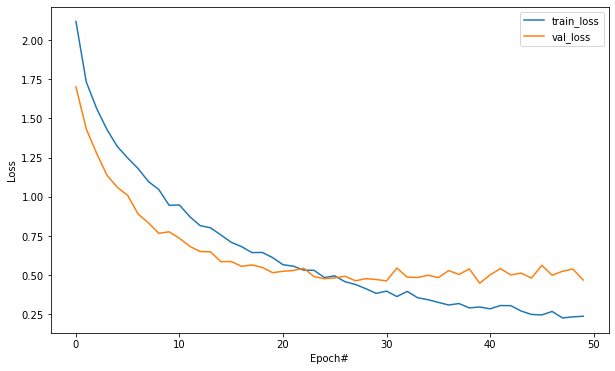

In [18]:
plt.figure(figsize=(10, 6))

# Plot the the training loss
plt.plot(results.history["loss"], label="train_loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")


# Name the x and y axises
plt.ylabel("Loss") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

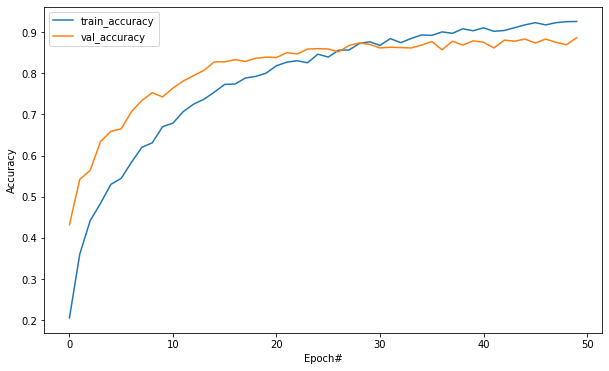

In [19]:
plt.figure(figsize=(10, 6))

# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="train_accuracy")


# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [20]:
# Evaluate the performance
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.8716


[0.6064311265945435, 0.8715517520904541]

In [21]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 32, 32, 1))

# Print the prediction result
prediction_result

array([[1.5770084e-08, 2.4619364e-06, 7.3086280e-11, 1.7339313e-05,
        9.9947542e-01, 5.2904365e-08, 3.4007538e-05, 4.6871457e-04,
        1.6005922e-06, 5.8468413e-07]], dtype=float32)

In [22]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

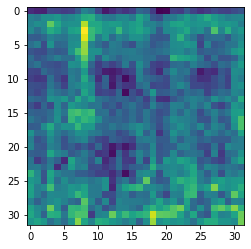

(32, 32)
This image belongs to class 4 with 0.9994754195213318 probability %
The actual class of the selected image is: [4]


In [23]:
plt.imshow(X_test[100])
plt.show()

print(X_test[100].shape)

# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")
print(f"The actual class of the selected image is: {y_test[100]}")